In [1]:
#1)Draw WM cerebellum mask using the mask cerebellum_bilateral from HCP
#2) mri_distance_transform cerebellum_bilateral_WMmask.nii 10 2 1 WMdistance_maxdistance2.nii
#3) fslmaths WMdistance_maxdistance2.nii -mas cerebellum_bilateral.nii WMdistance_maxdistance2_mask.nii
#4) wb_command -cifti-create-dense-from-template result_fromcerebellumtocerebellum.dscalar.nii WMdistance_maxdistance2_mask.dscalar.nii -volume-all WMdistance_maxdistance2_mask.nii
### result_fromcerebellumtocerebellum is template, corresponds to reuslt of functional gradients in cerebellum

In [3]:
import nibabel as nib, numpy as np, matplotlib
import matplotlib.pyplot as plt
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'
import sys
sys.path.append('gradient_data/src/')
from scipy.optimize import curve_fit
import scipy as scipy
from matplotlib import pyplot
import numpy
import sklearn
import seaborn as sns
from pyearth import Earth # install instructions: https://github.com/scikit-learn-contrib/py-earth/issues/89

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


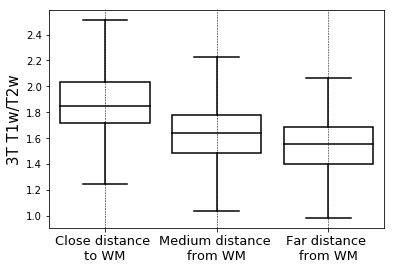

close to medium: Ttest_indResult(statistic=28.25354297251707, pvalue=3.409937394048447e-164)
far to medium: Ttest_indResult(statistic=-28.152158089580652, pvalue=2.5732462763630676e-166)
far to close: Ttest_indResult(statistic=-52.07005261489956, pvalue=0.0)


In [4]:
T1T2=nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
WMdis_registered_masked=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()

anat_img_data = T1T2.copy()

datatoplot = [anat_img_data[WMdis_registered_masked<1.099], 
              anat_img_data[(WMdis_registered_masked>2.015) & (WMdis_registered_masked<3.358)], 
              anat_img_data[WMdis_registered_masked>4.443]]

labels = ['Close distance \nto WM', 'Medium distance \nfrom WM', 'Far distance \nfrom WM']
ax = sns.boxplot(data=datatoplot, orient='v',showfliers=False, color='w')
plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

#sns.set_style('whitegrid')
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
ax.set_xticklabels(labels, size=13); plt.ylabel('3T T1w/T2w', size=15)
plt.savefig(os.path.abspath('./3T_distanceToWM.png'), format='png', dpi=600)
plt.show()

print('close to medium: '+str(scipy.stats.ttest_ind(anat_img_data[WMdis_registered_masked<0.501], anat_img_data[(WMdis_registered_masked>0.501) & (WMdis_registered_masked<2)], equal_var=False)))
print('far to medium: '+str(scipy.stats.ttest_ind(anat_img_data[WMdis_registered_masked>3.26], anat_img_data[(WMdis_registered_masked>0.501) & (WMdis_registered_masked<2)], equal_var=False)))
print('far to close: '+str(scipy.stats.ttest_ind(anat_img_data[WMdis_registered_masked>3.26], anat_img_data[(WMdis_registered_masked<0.501)], equal_var=False)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


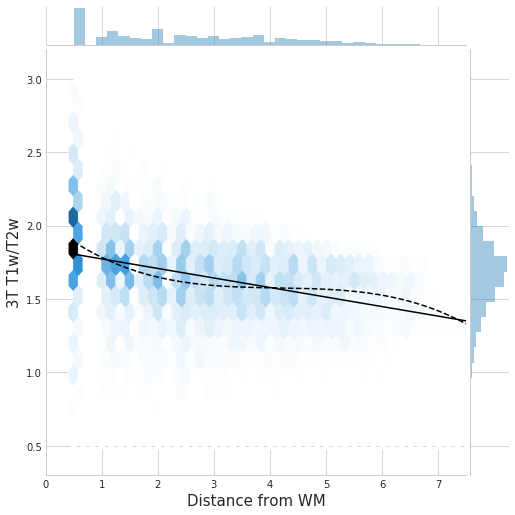

Linear equation:   
-0.06491 x + 1.838
Pearson r linear equation:  -0.37860042 , r^2:  0.14333828
Pearson p linear equation:  0.0
Spearman r linear equation:  -0.43424197427216693
Spearman p linear equation:  0.0
Quadratic equation:
           3           2
-0.005987 x + 0.07462 x - 0.3164 x + 2.031
r^2 for quadratic equation:  0.18137553901061798


In [33]:
T1T2=nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
WMdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()
sns.set_style("whitegrid")

fig = (sns.jointplot(WMdistance, T1T2, kind='hex', size=7, ratio=10,
                   xlim = [0, 7.5],
                   ylim = [0.3, 3.2], space=0.1, stat_func=None).set_axis_labels('Distance from WM', '3T T1w/T2w', fontsize=15))

#CALCULATE REGRESSIONS:
x= WMdistance[0]
xp = np.linspace(np.min(x), np.max(x), len(x)) 
y= T1T2[0]
z3 = np.polyfit(x, y, 3) #cubic regression
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1) #linear regression
p1 = np.poly1d(z1)
fig.ax_joint.plot(xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)

fig.savefig(os.path.abspath('./3T_distanceToWM_hex.png'), format='png', dpi=600, transparent=False)
plt.show()

pear_r = scipy.stats.pearsonr(T1T2[0], WMdistance[0])
spear_r = scipy.stats.spearmanr(T1T2[0], WMdistance[0])
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Quadratic equation:')
print((np.poly1d(p3)))
print('r^2 for quadratic equation: ', sklearn.metrics.r2_score(y, p3(x)))


/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.061178  1      0.061  0.000  0.000  
1     0       0    2477  0.059061  3      0.059  0.035  0.031  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.06  0.059  0.035  0.031  
1     1   2      0.06  0.061  0.012  0.010  
2     2   1      0.06  0.061  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.46003      
h(x0+1.11383)   No      0.0185248

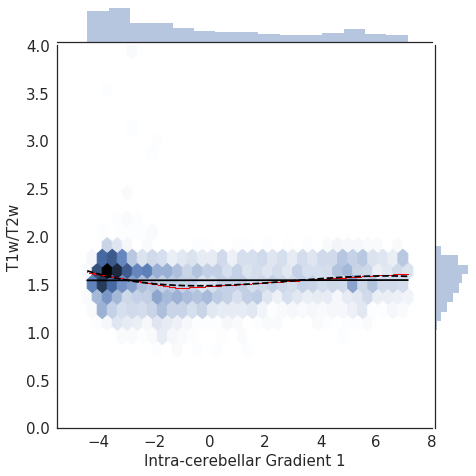

Linear equation:   
0.0002663 x + 1.543
Pearson r linear equation:  0.003646657 , r^2:  1.3298108e-05
Pearson p linear equation:  0.8467582732895934
Spearman r linear equation:  -0.014012690461283344
Spearman p linear equation:  0.45769787285784536
Cubic equation:
          3            2
-0.00068 x + 0.006092 x + 0.004927 x + 1.486
r^2 for cubic equation:  0.027714673126687628
r^2 for spline:  0.03460416459809179


In [6]:
#gradient 1, far distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr=4.443

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0][Mdistance>distancethr]
res_component2 = res[1][Mdistance>distancethr]
res_component3 = res[2][Mdistance>distancethr]
res_component4 = res[3][Mdistance>distancethr]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][Mdistance>distancethr]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-5.5, 8], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 1', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_Far_gradient1.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.097031  1      0.097  0.000  0.000  
1     0       0    1225  0.092602  3      0.093  0.046  0.043  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.09  0.093  0.046  0.043  
1     2   2      0.09  0.093  0.045  0.043  
2     1   1      0.10  0.097  0.000  0.000  
--------------------------------------------
Selected iteration: 1

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.82911      
h(x0-0.774515)  No      0.0345053

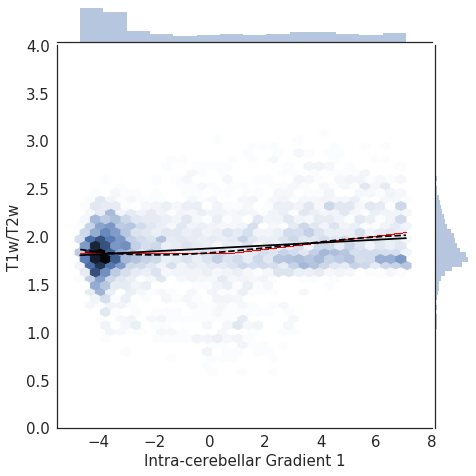

Linear equation:   
0.01516 x + 1.876
Pearson r linear equation:  0.18033996 , r^2:  0.032522503
Pearson p linear equation:  5.087022266829622e-28
Spearman r linear equation:  0.1547005068569484
Spearman p linear equation:  5.817209400192755e-21
Cubic equation:
            3           2
-0.0004314 x + 0.00391 x + 0.02001 x + 1.829
r^2 for cubic equation:  0.04074906397721967
r^2 for spline:  0.04476978097717055


In [7]:
#gradient 1, close distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr=1.099

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0][Mdistance<distancethr]
res_component2 = res[1][Mdistance<distancethr]
res_component3 = res[2][Mdistance<distancethr]
res_component4 = res[3][Mdistance<distancethr]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][Mdistance<distancethr]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-5.5, 8], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 1', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_close_gradient1.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.059274  1      0.059  0.000  0.000  
1     0       0    4672  0.056313  3      0.056  0.050  0.048  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.06  0.056  0.050  0.048  
1     2   2      0.06  0.057  0.038  0.037  
2     1   1      0.06  0.059  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.5461       
h(x0+3.70908)   No      0.0155486

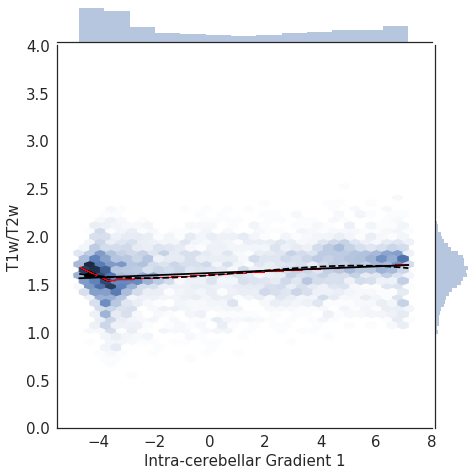

Linear equation:   
0.01158 x + 1.618
Pearson r linear equation:  0.18889892 , r^2:  0.0356828
Pearson p linear equation:  7.560645742053992e-39
Spearman r linear equation:  0.19078434068735578
Spearman p linear equation:  1.318025277934826e-39
Cubic equation:
            3            2
-0.0005819 x + 0.002602 x + 0.02173 x + 1.594
r^2 for cubic equation:  0.04205078243200133
r^2 for spline:  0.049950518463544924


In [8]:
#gradient 1, medium distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr1=3.358
distancethr2=2.015

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component2 = res[1][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component3 = res[2][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component4 = res[3][(Mdistance<distancethr1) & (Mdistance>distancethr2)]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-5.5, 8], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 1', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_medium_gradient1.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.061178  1      0.061  0.000  0.000  
1     0       0    1742  0.059832  3      0.060  0.022  0.019  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.06  0.060  0.022  0.019  
1     2   2      0.06  0.060  0.020  0.018  
2     1   1      0.06  0.061  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.5915       
h(x0-0.215113)  No      -0.082248

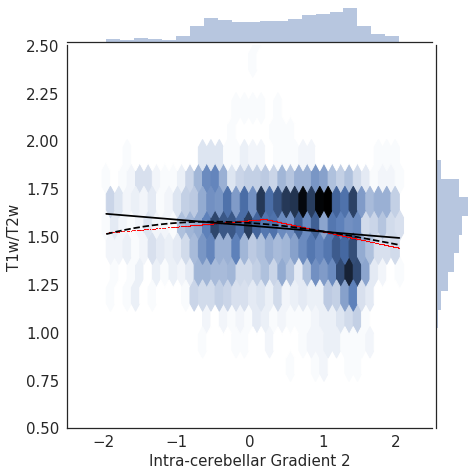

Linear equation:   
-0.03147 x + 1.557
Pearson r linear equation:  -0.10674812 , r^2:  0.011395161
Pearson p linear equation:  1.4002063638881308e-08
Spearman r linear equation:  -0.11587709577686886
Spearman p linear equation:  7.196546333862764e-10
Cubic equation:
          3           2
0.003191 x - 0.02175 x - 0.025 x + 1.571
r^2 for cubic equation:  0.015928201281664722
r^2 for spline:  0.022002001534160764


In [20]:
#gradient 2, far distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr=4.443

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[1][Mdistance>distancethr]
res_component2 = res[1][Mdistance>distancethr]
res_component3 = res[2][Mdistance>distancethr]
res_component4 = res[3][Mdistance>distancethr]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][Mdistance>distancethr]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.5, 2.5],
                   xlim = [-2.5, 2.5], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 2', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_Far_gradient2.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.097031  1      0.097  0.000  0.000  
1     0       0    1490  0.094221  3      0.095  0.029  0.026  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.09  0.095  0.029  0.026  
1     2   2      0.09  0.095  0.027  0.026  
2     1   1      0.10  0.097  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.87654      
h(x0-1.14492)   No      0.370281 

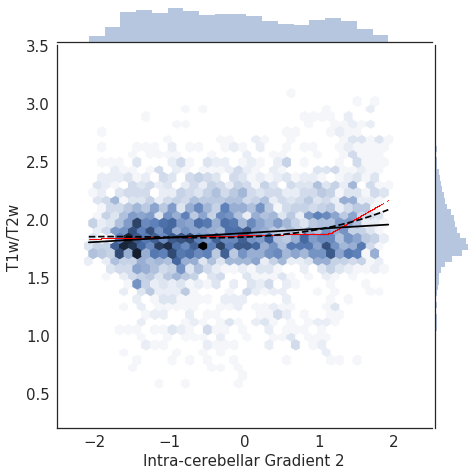

Linear equation:   
0.03833 x + 1.879
Pearson r linear equation:  0.12501295 , r^2:  0.015628237
Pearson p linear equation:  3.6008647654226576e-14
Spearman r linear equation:  0.11232830601143919
Spearman p linear equation:  1.0396943558879697e-11
Cubic equation:
          3           2
0.009464 x + 0.03246 x + 0.0253 x + 1.846
r^2 for cubic equation:  0.02479203566777377
r^2 for spline:  0.028952846784619735


In [16]:
#gradient 2, close distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr=1.099

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[1][Mdistance<distancethr]
res_component2 = res[1][Mdistance<distancethr]
res_component3 = res[2][Mdistance<distancethr]
res_component4 = res[3][Mdistance<distancethr]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][Mdistance<distancethr]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.2, 3.5],
                   xlim = [-2.5, 2.5], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 2', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_close_gradient2.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.059274  1      0.059  0.000  0.000  
1     0       0    1422  0.058432  3      0.059  0.014  0.012  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.06  0.059  0.014  0.012  
1     2   2      0.06  0.059  0.014  0.013  
2     1   1      0.06  0.059  0.000  0.000  
--------------------------------------------
Selected iteration: 1

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.61631      
h(x0-1.60022)   No      0.979244 

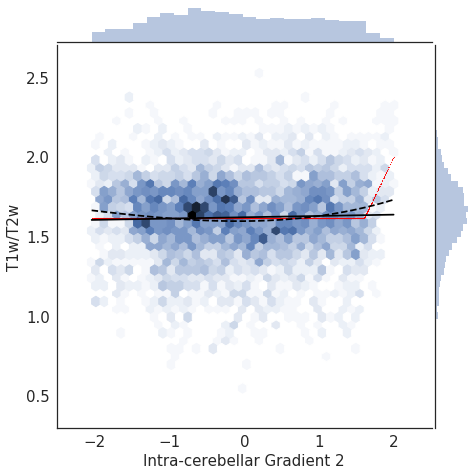

Linear equation:   
0.00823 x + 1.621
Pearson r linear equation:  0.033232845 , r^2:  0.001104422
Pearson p linear equation:  0.022996243845232574
Spearman r linear equation:  0.015048864551644897
Spearman p linear equation:  0.30334623731801735
Cubic equation:
          3           2
0.003341 x + 0.02509 x + 0.004113 x + 1.597
r^2 for cubic equation:  0.01049557089403419
r^2 for spline:  0.014196366657347248


In [18]:
#gradient 2, medium distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr1=3.358
distancethr2=2.015

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[1][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component2 = res[1][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component3 = res[2][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component4 = res[3][(Mdistance<distancethr1) & (Mdistance>distancethr2)]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.3, 2.7],
                   xlim = [-2.5, 2.5], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 2', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_medium_gradient2.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.061178  1      0.061  0.000  0.000  
1     0       0    2238  0.059589  3      0.060  0.026  0.023  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.06  0.060  0.026  0.023  
1     1   2      0.06  0.061  0.011  0.009  
2     2   1      0.06  0.061  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
--------------------------------------
Basis Function   Pruned  Coefficient  
--------------------------------------
(Intercept)      No      1.49114      
h(x0+0.344055)   No      0.07

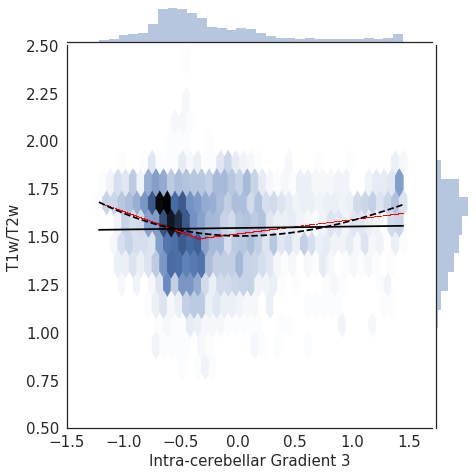

Linear equation:   
0.007875 x + 1.545
Pearson r linear equation:  0.018273618 , r^2:  0.00033392513
Pearson p linear equation:  0.3327965026063542
Spearman r linear equation:  -0.043965814811367174
Spearman p linear equation:  0.01974766655076107
Cubic equation:
          3           2
-0.01091 x + 0.09964 x - 0.007669 x + 1.503
r^2 for cubic equation:  0.02494167181694107
r^2 for spline:  0.025982164230222815


In [22]:
#gradient 3, far distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr=4.443

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[2][Mdistance>distancethr]
res_component2 = res[1][Mdistance>distancethr]
res_component3 = res[2][Mdistance>distancethr]
res_component4 = res[3][Mdistance>distancethr]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][Mdistance>distancethr]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.5, 2.5],
                   xlim = [-1.5, 1.7], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 3', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_Far_gradient3.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.097031  1      0.097  0.000  0.000  
1     0       0    1781  0.091104  3      0.091  0.061  0.058  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.09  0.091  0.061  0.058  
1     1   2      0.09  0.093  0.045  0.043  
2     2   1      0.10  0.097  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.75783      
h(x0-0.423641)  No      0.202491 

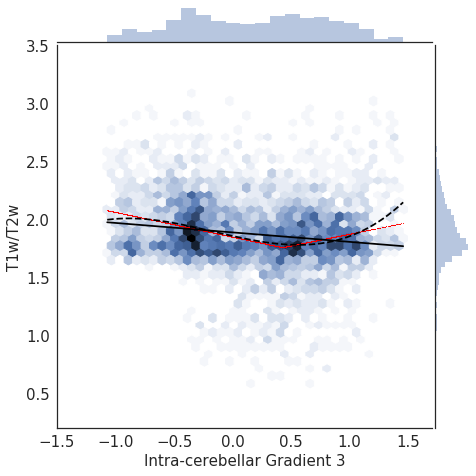

Linear equation:   
-0.08157 x + 1.886
Pearson r linear equation:  -0.15710491 , r^2:  0.024681952
Pearson p linear equation:  1.4135705774095107e-21
Spearman r linear equation:  -0.16478958294140258
Spearman p linear equation:  1.3215993390540197e-23
Cubic equation:
        3           2
0.1495 x + 0.07286 x - 0.2244 x + 1.855
r^2 for cubic equation:  0.065539282537882
r^2 for spline:  0.06108016228904367


In [23]:
#gradient 3, close distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr=1.099

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[2][Mdistance<distancethr]
res_component2 = res[1][Mdistance<distancethr]
res_component3 = res[2][Mdistance<distancethr]
res_component4 = res[3][Mdistance<distancethr]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][Mdistance<distancethr]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.2, 3.5],
                   xlim = [-1.5, 1.7], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 3', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_close_gradient3.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))

/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/xavierguell/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xavierguell/.local/lib/python3.5/site-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.059274  1      0.059  0.000  0.000  
1     0       0    4480  0.055533  3      0.056  0.063  0.061  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.06  0.056  0.063  0.061  
1     1   2      0.06  0.058  0.022  0.021  
2     2   1      0.06  0.059  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.51551      
h(x0-0.390512)  No      0.262875 

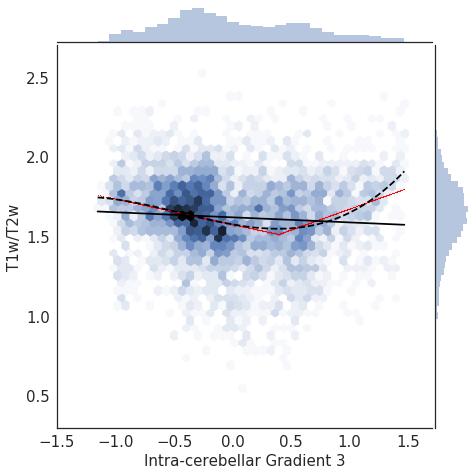

Linear equation:   
-0.03181 x + 1.62
Pearson r linear equation:  -0.07494002 , r^2:  0.0056160064
Pearson p linear equation:  2.8586613038182323e-07
Spearman r linear equation:  -0.11854974894029172
Spearman p linear equation:  4.065639661387056e-16
Cubic equation:
         3          2
0.08616 x + 0.1155 x - 0.1281 x + 1.576
r^2 for cubic equation:  0.06509670986976335
r^2 for spline:  0.06312183076582045


In [24]:
#gradient 3, medium distance layer

Mdistance=nib.load('WMdistance_maxdistance10_mask.dscalar.nii').get_data()[0]
distancethr1=3.358
distancethr2=2.015

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[2][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component2 = res[1][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component3 = res[2][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
res_component4 = res[3][(Mdistance<distancethr1) & (Mdistance>distancethr2)]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0][(Mdistance<distancethr1) & (Mdistance>distancethr2)]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.3, 2.7],
                   xlim = [-1.5, 1.7], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 3', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./_layers_3T_medium_gradient3.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print('Linear equation: ', (np.poly1d(p1)))
print('Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0]))
print('Pearson p linear equation: ', pear_r[1])
print('Spearman r linear equation: ', spear_r[0])
print('Spearman p linear equation: ', spear_r[1])
print('Cubic equation:')
print(np.poly1d(p3))
print('r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x)))
print( 'r^2 for spline: ', (model.score(Xearth, yearth)))